In [42]:
# VL EDA
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [43]:
# Read in the fruit data
fruit_DF = pd.read_csv("VL Fruit.csv")
vegetable_DF = pd.read_csv("VL Vegetables.csv")
LS_DF = pd.read_csv("VL Legumes and Seeds.csv")

In [44]:
fruit_DF.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Fruta,Estado,% Enfermedad,Calidad,Plaga,Recomendacion Organico,Recomendacion Quimico
0,"November 6, 2017",Lesbia/Camilo,Troilo,Troilo,Ricardo Javier Mendoza Arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Rita Arévalo Mora,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Calala,Transplantado,3.0,Bueno,NaN,NaN,NaN
4,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Papaya,Transplantado,2.0,Bueno,NaN,NaN,NaN


In [45]:
vegetable_DF.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Vegetales,Estado,% Enfermedad,Calidad,Plaga,Recomendacion Organico,Recomendacion Quimico
0,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Chiltoma,Transplantado,2,Bueno,Crizop,Ace,NaN
1,"November 6, 2017",Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,Chiltoma,Transplantado,0,Bueno,NaN,NaN,NaN
2,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,Chiltoma,Almácigo,NaN,NaN,NaN,NaN,NaN
3,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Cebolla,Almácigo,2,Bueno,Mosca blanca,Ace,NaN
4,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Chiltoma,Transplantado,2,Bueno,Mosca blanca,Ajo y Cebolla,NaN


In [46]:
LS_DF.head()

,Fecha Visita,Auditor,Unnamed: 2,Comunidad,Familia visitada,Presente?,Legumes and seeds,Estado,% Enfermedad,Calidad,Plaga,Recomendacion Organico,Recomendacion Quimico
0,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Frijol de vara,Transplantado,2.0,Bueno,Mosca blanca,Nim,NaN
1,"November 6, 2017",Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Frijol de vara,Transplantado,2.0,Bueno,Mosca blanca,Ajo y Cebolla,NaN
4,"November 6, 2017",Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Clean data. Remove any blank lines (If the lines were blank, then that family didn't have fruit)
name_table = {"Daisy Ramirez": "Maria Deisy Ramirez", "Danelia Martinez": "Danelia Martines Avendaño",
              "Maria Jose" : "Maria Jose Roque", "Melania Jacoba" : "Melania Jocoba Quiroz",
              "Nayelis Roque" : "Nayelis Daniela Roque Navarrete", "Rebeca Morales" : "Rebeca Carolina Sequeira Morales",
              "Yoseling Graciela Ramos Vanegas" : "Ricardo Javier Mendoza Arévalo"}
def clean_data(DF, col1):
    cleaned = []
    data_cols = [col1] + ["Estado", "% Enfermedad", "Calidad", "Plaga", "Recomendacion Organico", "Recomendacion Quimico"]
    for i in DF.index:
        if DF.iloc[i].isnull()[col1] or \
                  ((col1 == "Legumes and seeds" and DF.iloc[i][col1] == "I") \
                   or (col1 == "Fruta" and DF.iloc[i][col1] == "Verenjena") \
                   or (col1 == "Vegetales" and DF.iloc[i][col1] == "Tomate") \
                   or (col1 == "Fruta" and DF.iloc[i][col1] == "Chile") \
                   or (col1 == "Fruta" and DF.iloc[i][col1] == "Sandia y melon") \
                   or (col1 == "Legumes and seeds" and DF.iloc[i][col1] == "Ayote") \
                   or (col1 == "Vegetales" and DF.iloc[i][col1] == "Pipian")
                   or DF.iloc[i][col1] == "Frijoles rojo" \
                   or DF.iloc[i][col1] == "Frijol rojo" \
                   or DF.iloc[i][col1] == "frijol alacin" \
                   or DF.iloc[i][col1] == "Frijol alacin" \
                   or DF.iloc[i][col1] == "Frijol blanco" \
                   or DF.iloc[i][col1] == "Frijoles blanco" \
                   or DF.iloc[i][col1] == "Frijol Rojo" \
                   or (col1 == "Legumes and seeds" and DF.iloc[i][col1] == "Camote")):
            continue
        if not all([DF.iloc[i].isnull()[col] for col in data_cols]):
            row = []
            throw_away = False
            for col in DF:
                if col == "Fruta" and (DF.iloc[i][col] == "Pina" or DF.iloc[i][col] == "piña"):
                    throw_away = True
                elif col == "Vegetales" and (DF.iloc[i][col] == "Verngena" or \
                                             DF.iloc[i][col] == "Verengena" or \
                                             DF.iloc[i][col] == "verenjena" or \
                                             DF.iloc[i][col] == "verengena"):
                    row.append("Verenjena")
                elif col == "Vegetales" and DF.iloc[i][col] == "Rabano":
                    row.append("Rábano")
                elif col == "Vegetales" and (DF.iloc[i][col] == "Chile.." or \
                                            DF.iloc[i][col] == "Chile jalapeño"):
                    row.append("Chile")
                elif col == "Vegetales" and DF.iloc[i][col] == "Calabasa":
                    row.append("Calabaza")
                elif col == "Vegetales" and DF.iloc[i][col] == "zanahoria":
                    row.append("Zanahoria")
                elif DF.iloc[i][col] == "Pipian" or DF.iloc[i][col] == "Pipián":
                    row.append("Pipián")
                elif col == "% Enfermedad":
                    if DF.iloc[i].isnull()[col]:
                        row.append(0)
                    elif type(DF.iloc[i][col]) == str:
                        if DF.iloc[i][col].isdigit():
                            row.append(float(DF.iloc[i][col]))
                        else:
                            throw_away = True
                            break
                    else:
                        row.append(DF.iloc[i][col])
                elif col == "Presente?" and DF.iloc[i].isnull()[col]:
                    row.append("No")
                elif col == "Fecha Visita":
                    if "," in DF.iloc[i][col]:
                        row.append(datetime.strptime(DF.iloc[i][col], "%B %d, %Y"))
                    else:
                        row.append(datetime.strptime(DF.iloc[i][col], "%B %d %Y"))
                elif col == "Familia visitada":
                    if DF.iloc[i][col] in name_table:
                        row.append(name_table[DF.iloc[i][col]])
                    else:
                        row.append(DF.iloc[i][col])
                else:
                    row.append(DF.iloc[i][col])
            if not throw_away:
                cleaned.append(row)
    cols = []
    for col in DF:
        if col == "Unnamed: 2":
            cols.append("Región")
        else:
            cols.append(col)
    cleaned_DF = pd.DataFrame(cleaned, columns=cols)
    return cleaned_DF
cleaned_fruit_DF = clean_data(fruit_DF, "Fruta")
cleaned_vegetable_DF = clean_data(vegetable_DF, "Vegetales")
cleaned_LS_DF = clean_data(LS_DF, "Legumes and seeds")

In [48]:
cleaned_fruit_DF

,Fecha Visita,Auditor,Región,Comunidad,Familia visitada,Presente?,Fruta,Estado,% Enfermedad,Calidad,Plaga,Recomendacion Organico,Recomendacion Quimico
0,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Calala,Transplantado,3.0,Bueno,NaN,NaN,NaN
1,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Papaya,Transplantado,2.0,Bueno,NaN,NaN,NaN
2,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,Calala,Transplantado,3.0,Bueno,NaN,NaN,NaN
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Papaya,Transplantado,2.0,Bueno,NaN,NaN,NaN
4,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Calala,Transplantado,2.0,Bueno,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2021-01-08,Lesbia/Camilo,Goyena,Las Pampas,Oralia Ramirez,Si,Plátano,Transplantado,0.0,Excelente,NaN,NaN,NaN
2652,2021-01-08,Lesbia/Camilo,Goyena,Las Pampas,Oralia Ramirez,Si,Guayaba,Transplantado,0.0,Excelente,NaN,NaN,NaN
2653,2021-01-08,Lesbia/Camilo,Goyena,Goyena Sur,Rebeca Carolina Sequeira Morales,Si,Tomate,Transplantado,0.0,Excelente,NaN,NaN,NaN
2654,2021-01-08,Lesbia/Camilo,Goyena,Las Pampas,Silvia Elena Moran,Si,Plátano,Transplantado,0.0,Excelente,NaN,NaN,NaN


In [49]:
cleaned_vegetable_DF

,Fecha Visita,Auditor,Región,Comunidad,Familia visitada,Presente?,Vegetales,Estado,% Enfermedad,Calidad,Plaga,Recomendacion Organico,Recomendacion Quimico
0,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Chiltoma,Transplantado,2.0,Bueno,Crizop,Ace,NaN
1,2017-11-06,Lesbia/Camilo,Troilo,Cacique Adiac,Ávila Vargas,Si,Chiltoma,Transplantado,0.0,Bueno,NaN,NaN,NaN
2,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Claudia Flavia Arévalo,Si,Chiltoma,Almácigo,0.0,NaN,NaN,NaN,NaN
3,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Cebolla,Almácigo,2.0,Bueno,Mosca blanca,Ace,NaN
4,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Chiltoma,Transplantado,2.0,Bueno,Mosca blanca,Ajo y Cebolla,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,2021-01-08,Lesbia/Camilo,Goyena,Las Pampas,Oralia Ramirez,Si,Chiltoma,Transplantado,3.0,Bueno,Trip,Ace,NaN
2780,2021-01-08,Lesbia/Camilo,Goyena,Las Pampas,Oralia Ramirez,Si,Pepino,Transplantado,0.0,Excelente,NaN,NaN,NaN
2781,2021-01-08,Lesbia/Camilo,Goyena,Goyena Sur,Rebeca Carolina Sequeira Morales,Si,Chiltoma,Transplantado,0.0,Excelente,NaN,NaN,NaN
2782,2021-01-08,Lesbia/Camilo,Goyena,Las Pampas,Silvia Elena Moran,Si,Chiltoma,Transplantado,0.0,Excelente,NaN,NaN,NaN


In [50]:
cleaned_LS_DF

,Fecha Visita,Auditor,Región,Comunidad,Familia visitada,Presente?,Legumes and seeds,Estado,% Enfermedad,Calidad,Plaga,Recomendacion Organico,Recomendacion Quimico
0,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 2,Ana Catalina García Millón,Si,Frijol de vara,Transplantado,2.0,Bueno,Mosca blanca,Nim,NaN
1,2017-11-06,Lesbia/Camilo,Troilo,Ceiba 1,Cristina Alvares Solís,Si,Frijol de vara,Transplantado,2.0,Bueno,Mosca blanca,Ajo y Cebolla,NaN
2,2017-11-07,Lesbia/Camilo,Goyena,Aristides Sanchez,Jose Salazar,Si,Frijol de vara,Transplantado,15.0,Pobre,Cercospora,NaN,NaN
3,2017-11-20,Lesbia/Camilo,Troilo,Ceiba 1,Karla Galiano Martínez,Si,Frijol de vara,Transplantado,2.0,Bueno,Mildiu,Bicarbonato,NaN
4,2017-11-23,Lesbia/Camilo,Troilo,Troilo,Claudia Barrera,Si,Pipián,Transplantado,3.0,Bueno,Crizopa,Ace,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,2021-01-05,Lesbia/Camilo,Goyena,Las Parcelas,Melania Jocoba Quiroz,Si,Frijol de vara,Transplantado,0.0,Excelente,NaN,NaN,NaN
999,2021-01-05,Lesbia/Camilo,Goyena,Las Parcelas,Melania Jocoba Quiroz,Si,Frijol de vara,Transplantado,0.0,Excelente,NaN,NaN,NaN
1000,2021-01-07,Lesbia/Camilo,Troilo,Santa Lucia,Anielka Morales,Si,Frijol de vara,Transplantado,0.0,Excelente,NaN,NaN,NaN
1001,2021-01-08,Lesbia/Camilo,Goyena,Goyena Sur,Johana Mercedes Salgado,Si,Frijol de vara,Transplantado,13.0,Promedio,Cercospora,Bicarbonato,NaN


In [51]:
# Ensure that all entries in the Presente? column are marked to no if no data was input
counter = 0
for i in cleaned_fruit_DF.index:
    if cleaned_fruit_DF.iloc[i]["Presente?"] == "Si" or cleaned_fruit_DF.iloc[i]["Presente?"] == "No":
        counter += 1
print(counter, len(cleaned_fruit_DF.index))

2656 2656


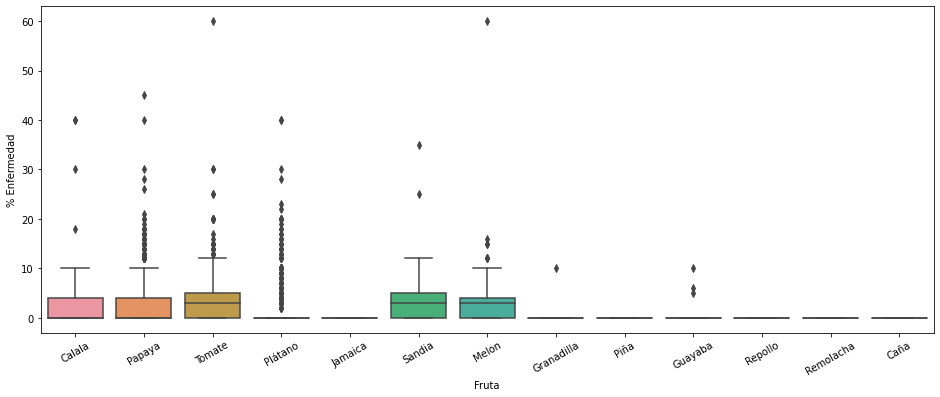

In [52]:
# Create a box plot showing each fruit's liklihood of getting sick
plt.figure(figsize=(16, 6))
fruit_box = sns.boxplot(data=cleaned_fruit_DF, x="Fruta", y="% Enfermedad")
fruit_box.set_xticklabels(fruit_box.get_xticklabels(), rotation=30)
fruit_box

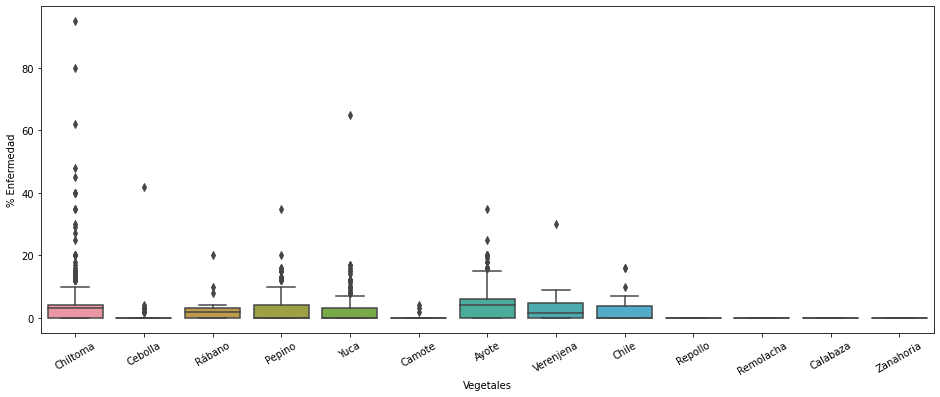

In [53]:
# Create a box plot showing each vegetable's liklihood of getting sick
plt.figure(figsize=(16, 6))
vegetable_box = sns.boxplot(data=cleaned_vegetable_DF, x="Vegetales", y="% Enfermedad")
vegetable_box.set_xticklabels(vegetable_box.get_xticklabels(), rotation=30)
vegetable_box

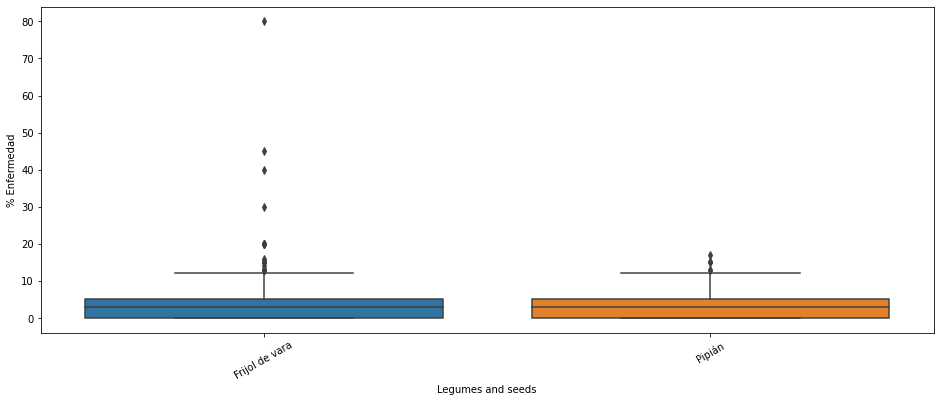

In [54]:
# Create a box plot showing each LS's liklihood of getting sick
plt.figure(figsize=(16, 6))
LS_box = sns.boxplot(data=cleaned_LS_DF, x="Legumes and seeds", y="% Enfermedad")
LS_box.set_xticklabels(LS_box.get_xticklabels(), rotation=30)
LS_box

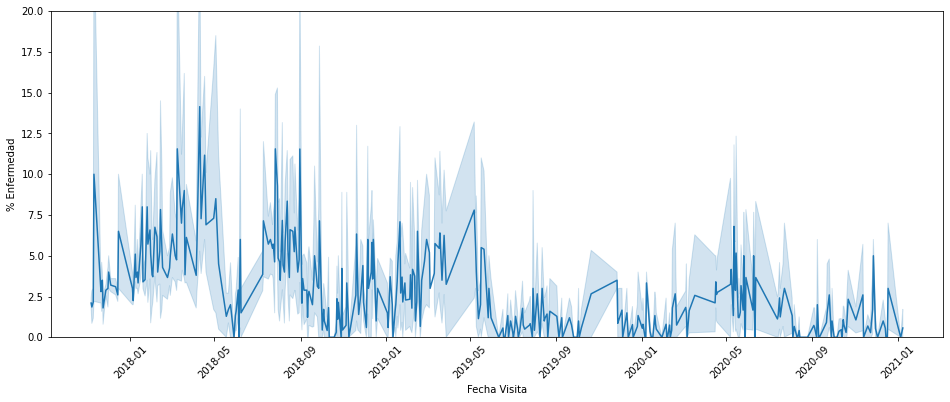

In [55]:
# Create a line plot for fruit sickness over time
plt.figure(figsize=(16, 6))
fruit_line = sns.lineplot(data=cleaned_fruit_DF, x="Fecha Visita", y="% Enfermedad")
plt.xticks(rotation=45)
fruit_line.set(ylim=(0, 20))
fruit_line

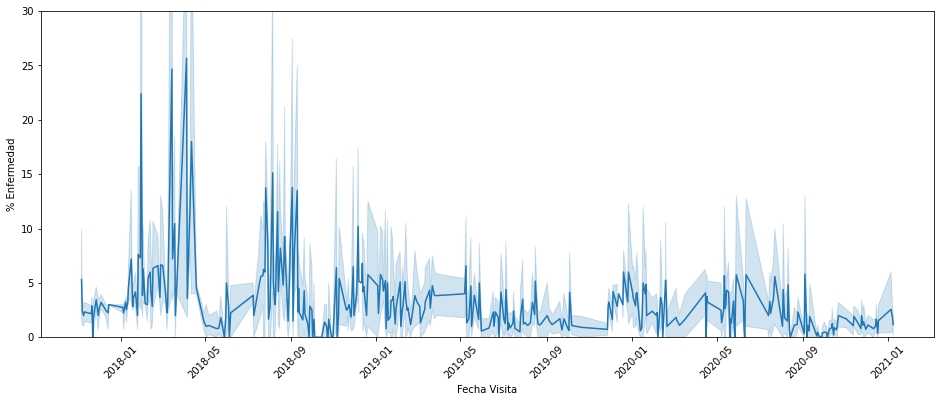

In [56]:
# Create a line plot for vegetable sickness over time
plt.figure(figsize=(16, 6))
vegetable_line = sns.lineplot(data=cleaned_vegetable_DF, x="Fecha Visita", y="% Enfermedad")
plt.xticks(rotation=45)
vegetable_line.set(ylim=(0, 30))
vegetable_line

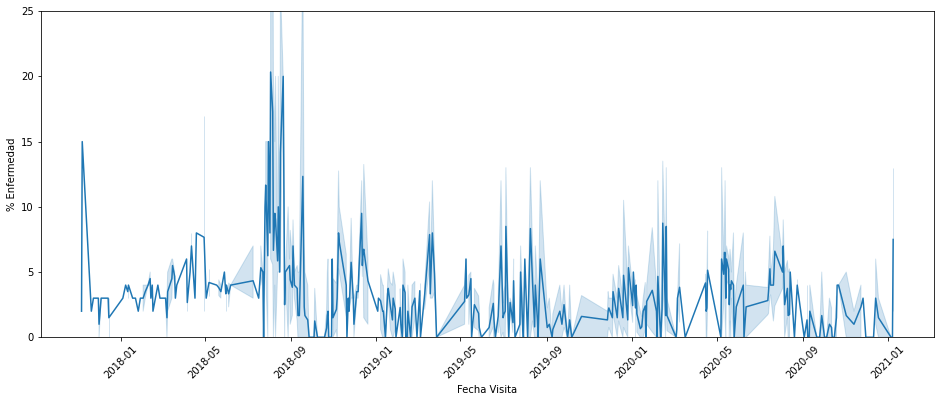

In [57]:
# Create a line plot for monthly Legume and seed sickness over time
plt.figure(figsize=(16, 6))
LS_line = sns.lineplot(data=cleaned_LS_DF, x="Fecha Visita", y="% Enfermedad")
plt.xticks(rotation=45)
LS_line.set(ylim=(0, 25))
LS_line

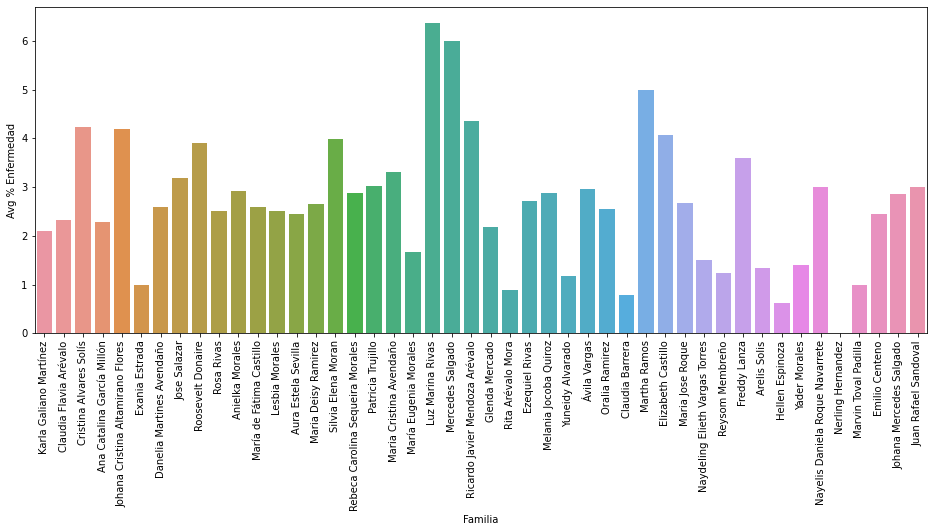

In [58]:
# Create a bar chart for each family's average sickness for fruit
# Get averages
fruit_averages_dict = {}
fruit_averages_lst = []
fruit_averages_names = []
for i in cleaned_fruit_DF.index:
    curr = cleaned_fruit_DF.iloc[i]["Familia visitada"]
    if curr in fruit_averages_dict:
        fruit_averages_dict[curr] = (fruit_averages_dict[curr][0], fruit_averages_dict[curr][1] + 1)
        fruit_averages_lst[fruit_averages_dict[curr][0]] += cleaned_fruit_DF.iloc[i]["% Enfermedad"]
    else:
        fruit_averages_dict[curr] = (len(fruit_averages_lst), 1)
        fruit_averages_lst.append(cleaned_fruit_DF.iloc[i]["% Enfermedad"])
        fruit_averages_names.append(curr)
for key in fruit_averages_dict.keys():
    fruit_averages_lst[fruit_averages_dict[key][0]] /= fruit_averages_dict[key][1]
fruit_avg_data = [[fruit_averages_names[i], fruit_averages_lst[i]] for i in range(len(fruit_averages_names))]
fruit_averages_DF = pd.DataFrame(fruit_avg_data, columns=["Familia", "Avg % Enfermedad"])
plt.figure(figsize=(16, 6))
fruit_family_bar = sns.barplot(data=fruit_averages_DF, x="Familia", y="Avg % Enfermedad")
plt.xticks(rotation=90)
fruit_family_bar

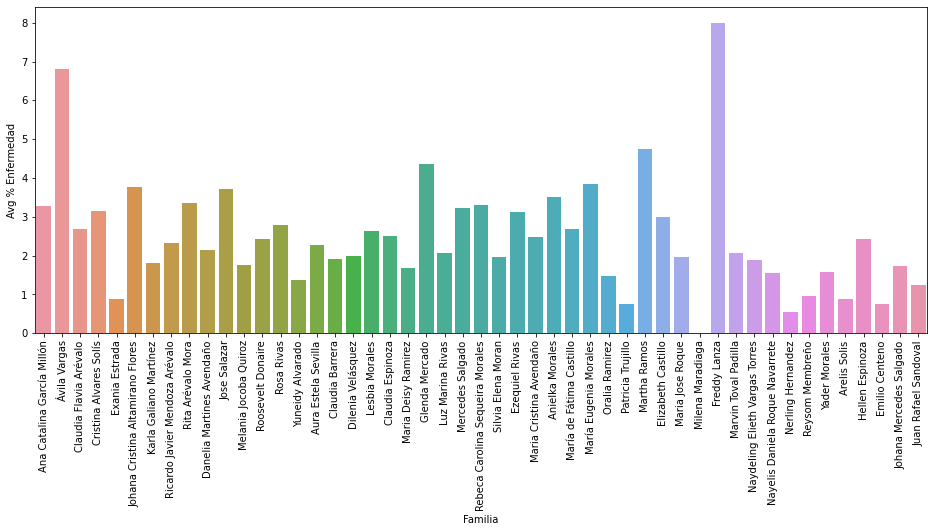

In [59]:
# Create a bar chart for each family's average sickness for vegetables
# Get averages
vegetable_averages_dict = {}
vegetable_averages_lst = []
vegetable_averages_names = []
for i in cleaned_vegetable_DF.index:
    curr = cleaned_vegetable_DF.iloc[i]["Familia visitada"]
    if curr in vegetable_averages_dict:
        vegetable_averages_dict[curr] = (vegetable_averages_dict[curr][0], vegetable_averages_dict[curr][1] + 1)
        vegetable_averages_lst[vegetable_averages_dict[curr][0]] += cleaned_vegetable_DF.iloc[i]["% Enfermedad"]
    else:
        vegetable_averages_dict[curr] = (len(vegetable_averages_lst), 1)
        vegetable_averages_lst.append(cleaned_vegetable_DF.iloc[i]["% Enfermedad"])
        vegetable_averages_names.append(curr)
for key in vegetable_averages_dict.keys():
    vegetable_averages_lst[vegetable_averages_dict[key][0]] /= vegetable_averages_dict[key][1]
vegetable_avg_data = [[vegetable_averages_names[i], vegetable_averages_lst[i]] for i in range(len(vegetable_averages_names))]
vegetable_averages_DF = pd.DataFrame(vegetable_avg_data, columns=["Familia", "Avg % Enfermedad"])
plt.figure(figsize=(16, 6))
vegetable_family_bar = sns.barplot(data=vegetable_averages_DF, x="Familia", y="Avg % Enfermedad")
plt.xticks(rotation=90)
vegetable_family_bar

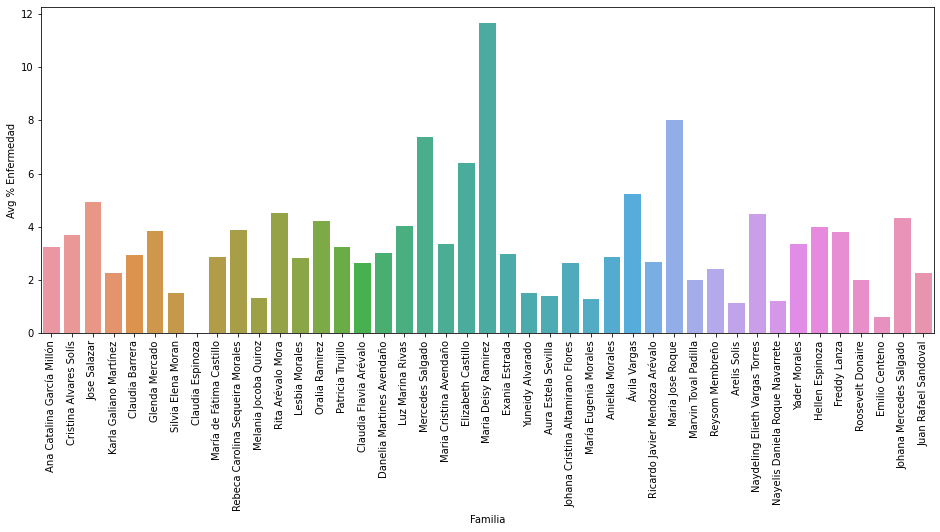

In [60]:
# Create a bar chart for each family's average sickness for legumes and seeds
# Get averages
LS_averages_dict = {}
LS_averages_lst = []
LS_averages_names = []
for i in cleaned_LS_DF.index:
    curr = cleaned_LS_DF.iloc[i]["Familia visitada"]
    if curr in LS_averages_dict:
        LS_averages_dict[curr] = (LS_averages_dict[curr][0], LS_averages_dict[curr][1] + 1)
        LS_averages_lst[LS_averages_dict[curr][0]] += cleaned_LS_DF.iloc[i]["% Enfermedad"]
    else:
        LS_averages_dict[curr] = (len(LS_averages_lst), 1)
        LS_averages_lst.append(cleaned_LS_DF.iloc[i]["% Enfermedad"])
        LS_averages_names.append(curr)
for key in LS_averages_dict.keys():
    LS_averages_lst[LS_averages_dict[key][0]] /= LS_averages_dict[key][1]
LS_avg_data = [[LS_averages_names[i], LS_averages_lst[i]] for i in range(len(LS_averages_names))]
LS_averages_DF = pd.DataFrame(LS_avg_data, columns=["Familia", "Avg % Enfermedad"])
plt.figure(figsize=(16, 6))
LS_family_bar = sns.barplot(data=LS_averages_DF, x="Familia", y="Avg % Enfermedad")
plt.xticks(rotation=90)
LS_family_bar

In [61]:
# Download the data frames for the charts as a CSV
cleaned_fruit_DF.to_csv(r'cleanedFruit.csv', index = False)
cleaned_vegetable_DF.to_csv(r'cleanedVegetables.csv', index = False)
cleaned_LS_DF.to_csv(r'cleanedLegumesAndSeeds.csv', index = False)
fruit_averages_DF.to_csv(r'averageFruit.csv', index = False)
vegetable_averages_DF.to_csv(r'averageVegetables.csv', index = False)
LS_averages_DF.to_csv(r'averageLegumesAndSeeds.csv', index = False)